### 1) Recreate Scatterplot from Gapminder Notebook

In [2]:
# load data

import pandas as pd

fert = pd.read_csv('/home/denniss/Downloads/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('/home/denniss/Downloads/gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel('/home/denniss/Downloads/gapminder_population.xlsx', index_col=0)

In [3]:
# change data type of year columns from str to int

ncol = [int(x) for x in fert.columns]

fert.set_axis(axis=1, labels=ncol, inplace=True)

In [4]:
# create wide tables

sfert = fert.stack()
slife = life.stack()
spop = pop.stack()

In [5]:
# put data together in one DataFrame

d = {'fertility': sfert, 'lifeexp': slife, 'population': spop}
df = pd.DataFrame(data=d)

In [6]:
# show pop in millions

df['pop_in_mill'] = df['population'] / 1000000
df = df.drop(columns=['population'])
df

fertility  lifeexp  pop_in_mill
Afghanistan 1800        7.0    28.21     3.280000
            1801        7.0    28.20          NaN
            1802        7.0    28.19          NaN
            1803        7.0    28.18          NaN
            1804        7.0    28.17          NaN
...                     ...      ...          ...
Åland       2006        NaN    80.10     0.026923
            2007        NaN      NaN     0.026923
            2008        NaN      NaN     0.026923
            2009        NaN      NaN     0.026923
            2010        NaN      NaN     0.026923

[47688 rows x 3 columns]

In [22]:
# inspect missing values

df[pd.isnull(df.fertility)]

fertility  lifeexp  pop_in_mill
Afghanistan           2016        NaN    52.72          NaN
Akrotiri and Dhekelia 1950        NaN      NaN     0.010661
                      1951        NaN      NaN     0.010737
                      1952        NaN      NaN     0.010813
                      1953        NaN      NaN     0.010889
...                               ...      ...          ...
Yugoslavia            2006        NaN      NaN    23.887171
                      2007        NaN      NaN    23.946096
                      2008        NaN      NaN    23.988543
Zambia                2016        NaN    57.10          NaN
Zimbabwe              2016        NaN    61.69          NaN

[4215 rows x 3 columns]

In [20]:
df[pd.isnull(df.lifeexp)]

fertility  lifeexp  pop_in_mill
Akrotiri and Dhekelia 1950        NaN      NaN     0.010661
                      1951        NaN      NaN     0.010737
                      1952        NaN      NaN     0.010813
                      1953        NaN      NaN     0.010889
                      1954        NaN      NaN     0.010966
...                               ...      ...          ...
Yugoslavia            2004        NaN      NaN    23.719918
                      2005        NaN      NaN    23.811905
                      2006        NaN      NaN    23.887171
                      2007        NaN      NaN    23.946096
                      2008        NaN      NaN    23.988543

[3780 rows x 3 columns]

In [19]:
df[pd.isnull(df.pop_in_mill)]

fertility  lifeexp  pop_in_mill
Afghanistan 1801       7.00    28.20          NaN
            1802       7.00    28.19          NaN
            1803       7.00    28.18          NaN
            1804       7.00    28.17          NaN
            1805       7.00    28.16          NaN
...                     ...      ...          ...
Zimbabwe    1946       6.75    42.55          NaN
            1947       6.75    44.03          NaN
            1948       6.75    45.50          NaN
            1949       6.75    46.98          NaN
            2016        NaN    61.69          NaN

[27512 rows x 3 columns]

In [23]:
# stacking and unstacking

df2 = df.stack()
df3 = df2.unstack(1)
df3 = df3[1950]
df3 = df3.unstack(1)
df3

,fertility,lifeexp,pop_in_mill
Afghanistan,7.67,26.85,7.752118
Akrotiri and Dhekelia,NaN,NaN,0.010661
Albania,5.80,54.48,1.263171
Algeria,7.65,42.77,8.872247
American Samoa,NaN,NaN,0.018937
...,...,...,...
Western Sahara,6.32,34.75,0.013766
Yemen,7.27,23.51,4.402320
Yugoslavia,NaN,NaN,16.285527
Zambia,6.71,42.85,2.316950


([<matplotlib.axis.YTick at 0x7f4576ef75d0>,
 <a list of 10 Text yticklabel objects>)

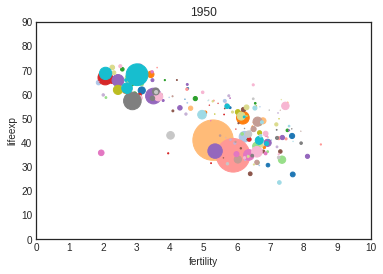

In [95]:
# customize plot

cmap = plt.get_cmap('tab20', lut = len(df3)).colors # add colormap
df3.plot.scatter('fertility', 'lifeexp', s=df3['pop_in_mill'] * 3, c=cmap)
plt.title(f'1950') # Add year to title
plt.xticks(list(range(0, 11))) # Fix ticks, so they don't jump around
plt.yticks(list(range(0, 100, 10))) # Fix ticks

### 2) Bar plots for average life expectancy and fertility rate

In [24]:
# Calculate mean

l_mean = df3['lifeexp'].mean()
f_mean = df3['fertility'].mean()

In [25]:
# Awkwardly create necessary table format

df_bar = pd.DataFrame({'l_mean': [l_mean], 'f_mean': [f_mean]})
df_bar2 = pd.DataFrame(df_bar.unstack())
df_bar2 = df_bar2.reset_index().rename(columns={0:'mean', 'level_0': 'lifeexp_fertility'})
df_bar2 = df_bar2.drop(columns='level_1').set_index('lifeexp_fertility')
df_bar2

,mean
lifeexp_fertility,
l_mean,49.259752
f_mean,5.433532


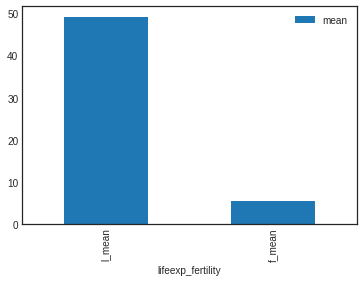

In [26]:
# Plotting

import pylab as plt

plt.style.use('seaborn-white')

df_bar2.plot.bar()

/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see

/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see

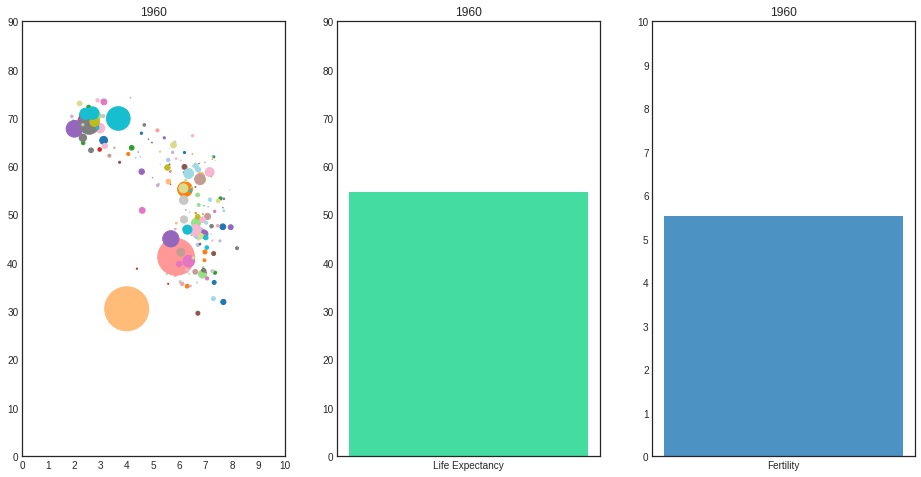

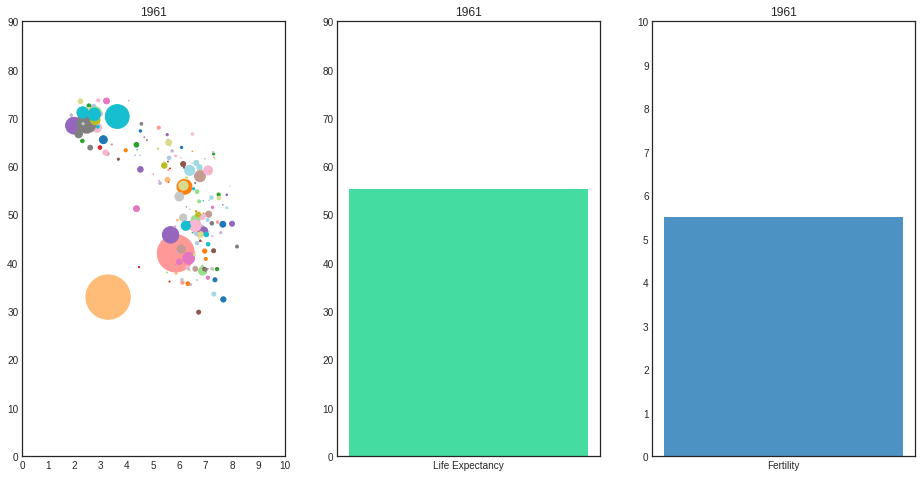

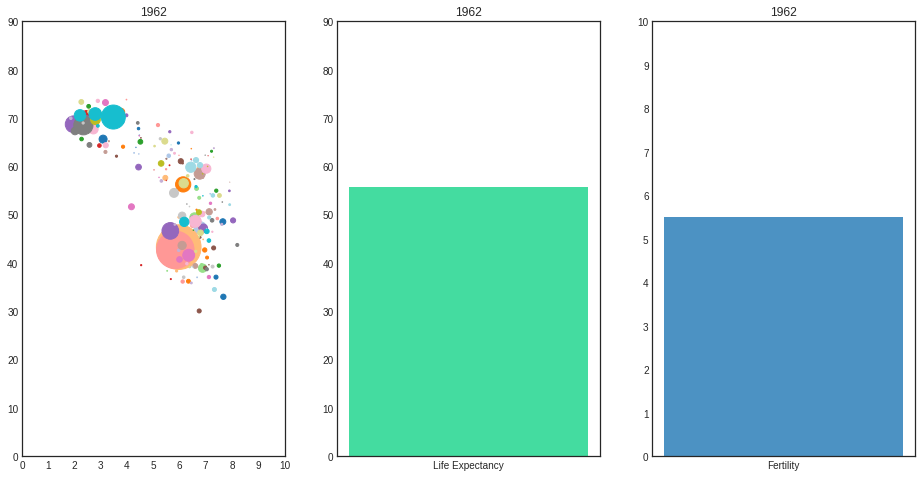

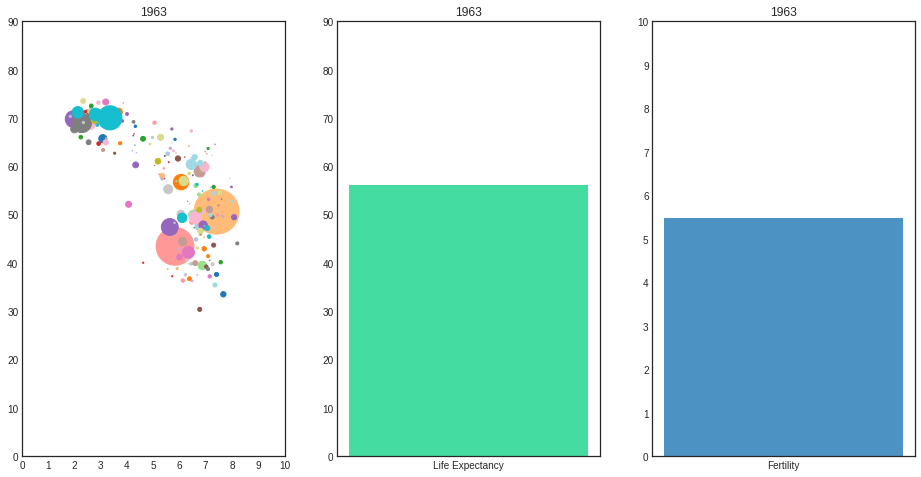

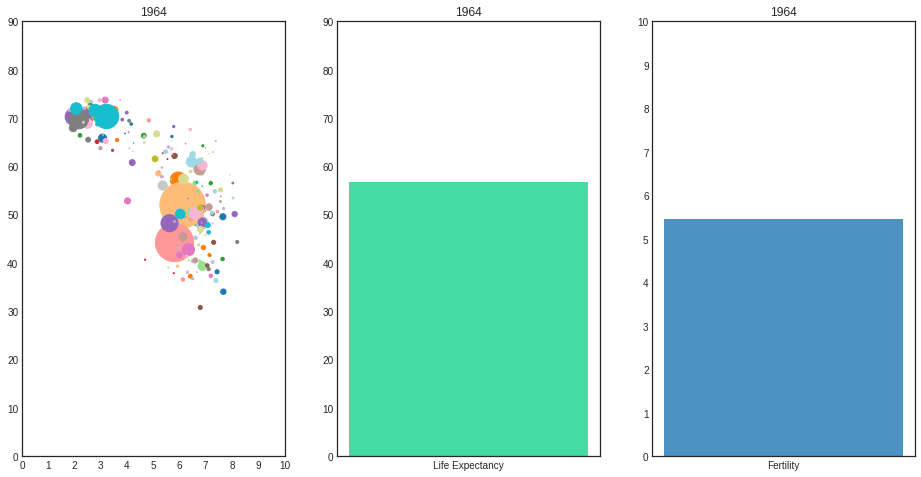

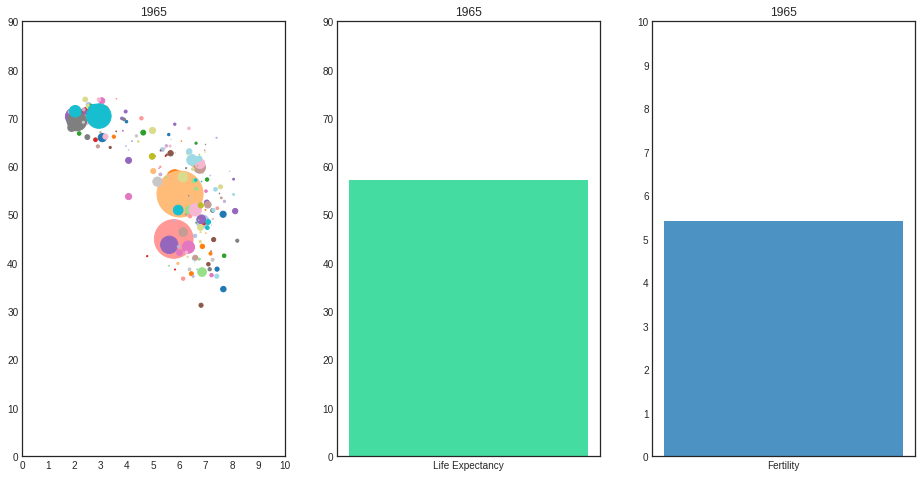

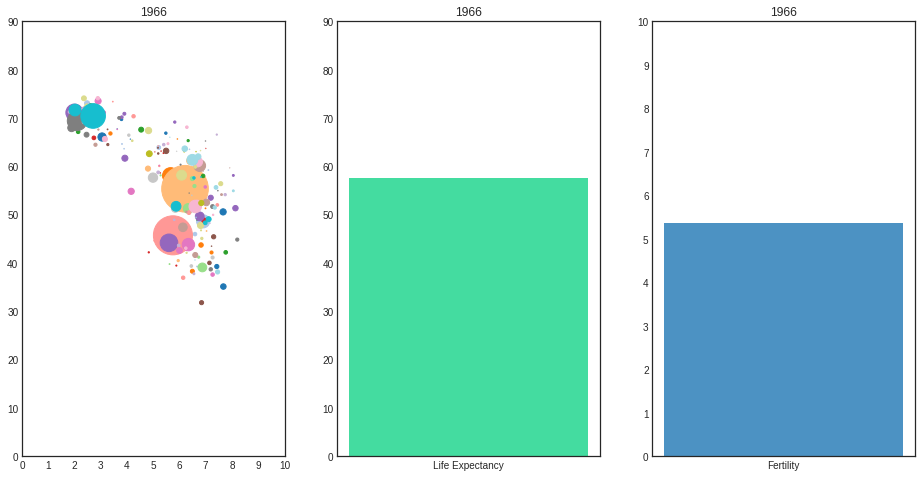

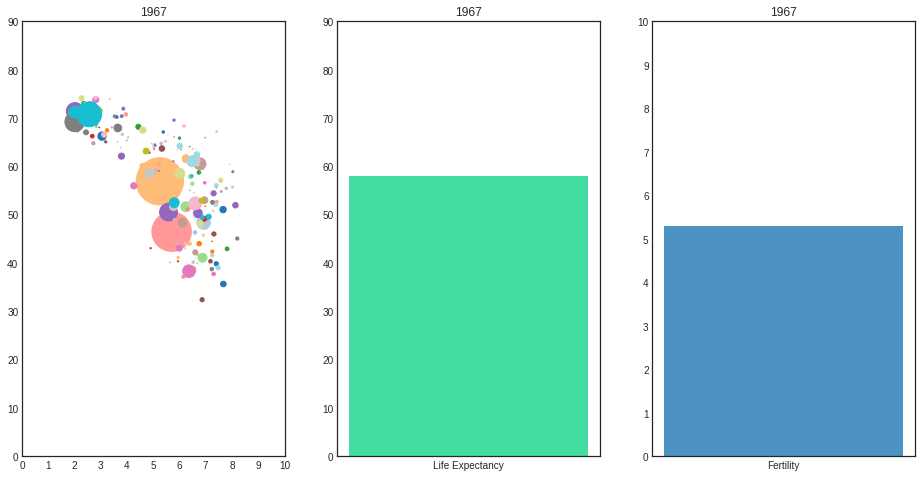

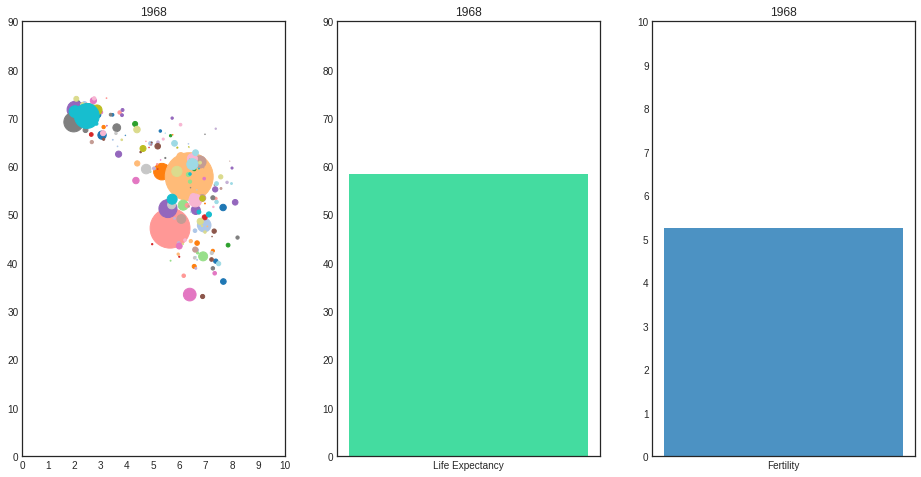

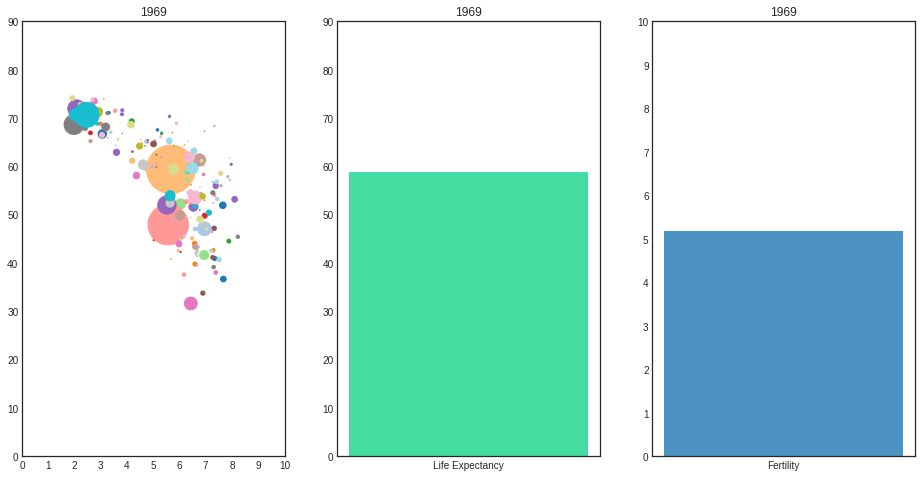

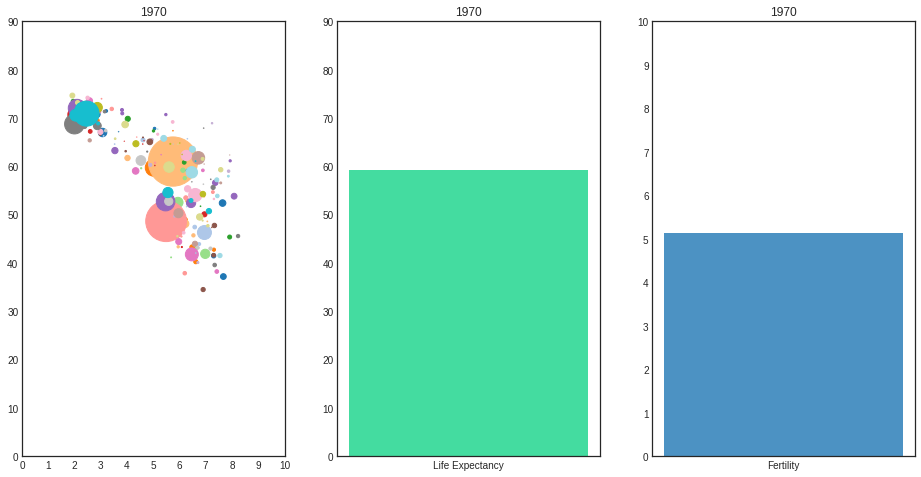

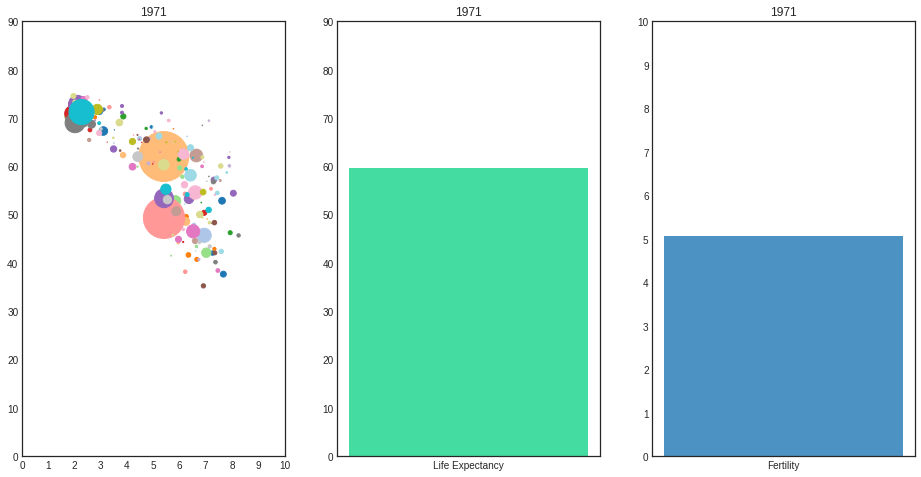

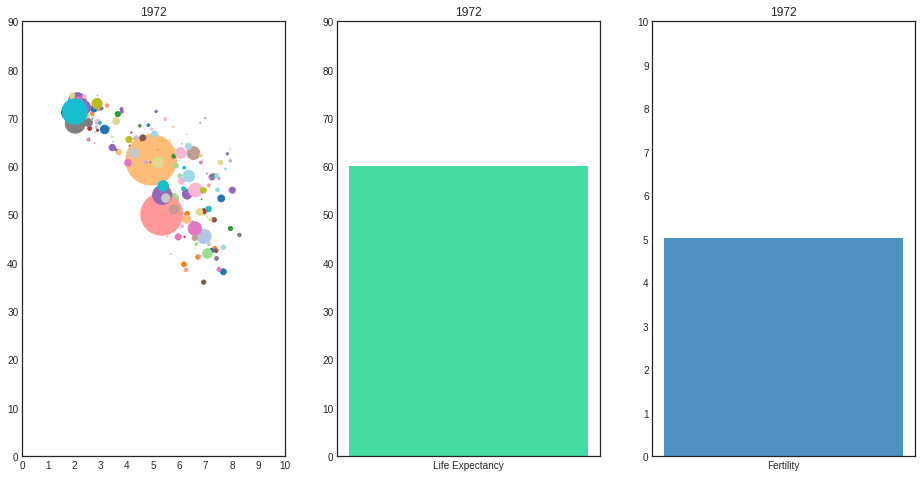

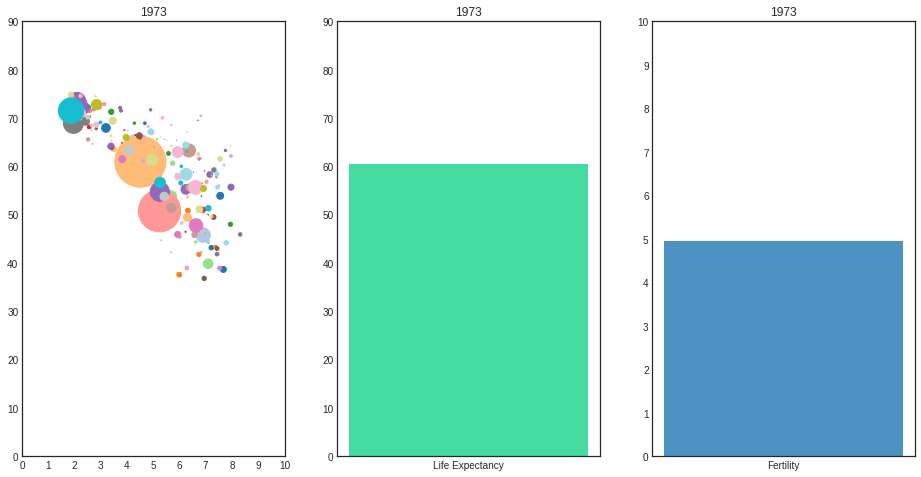

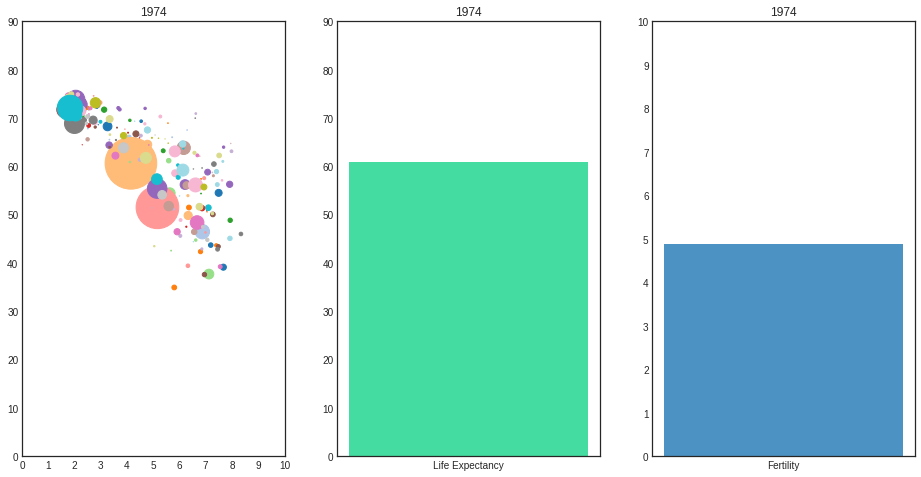

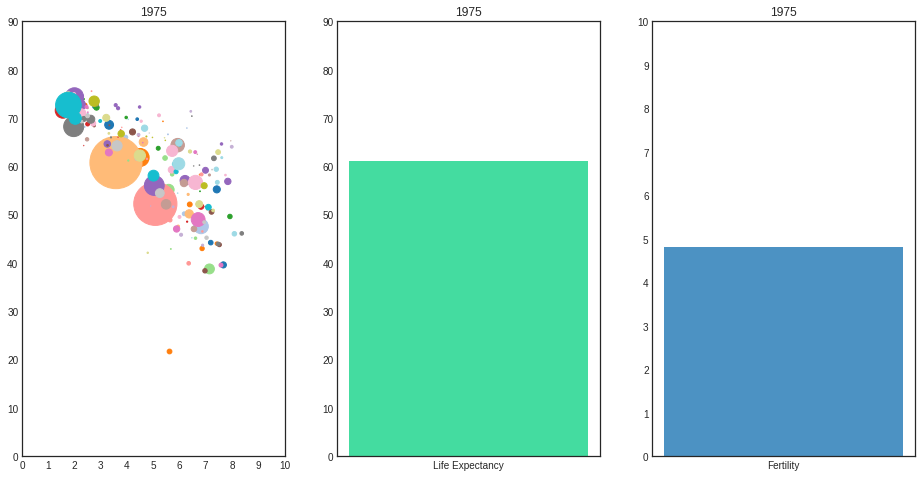

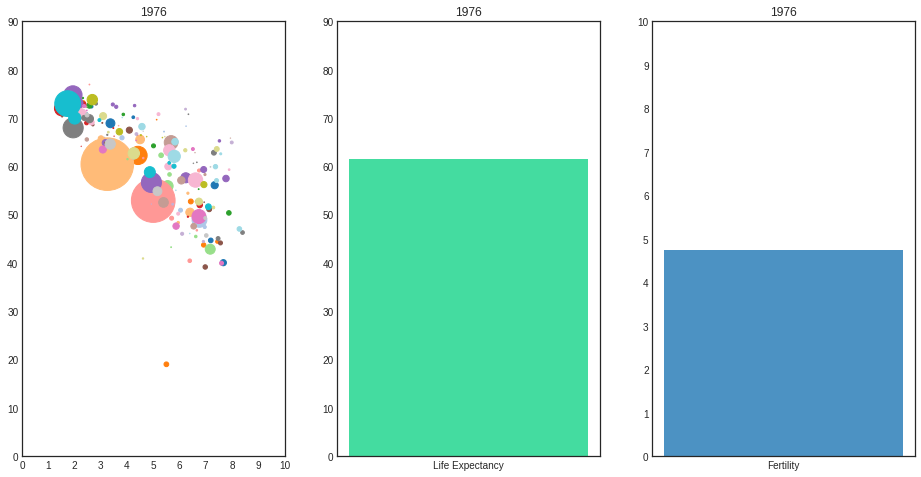

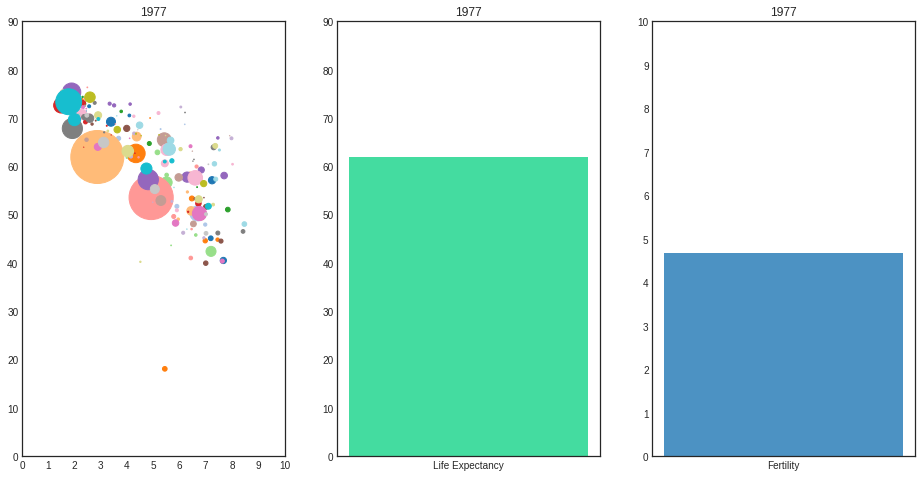

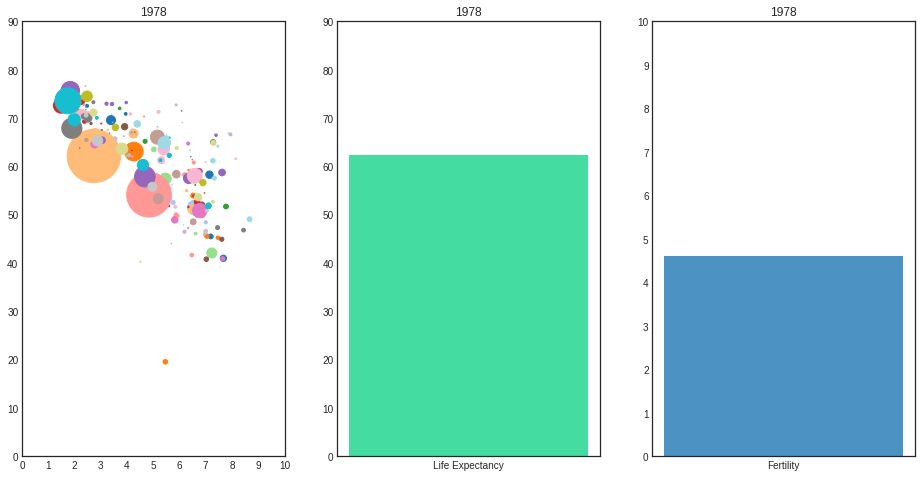

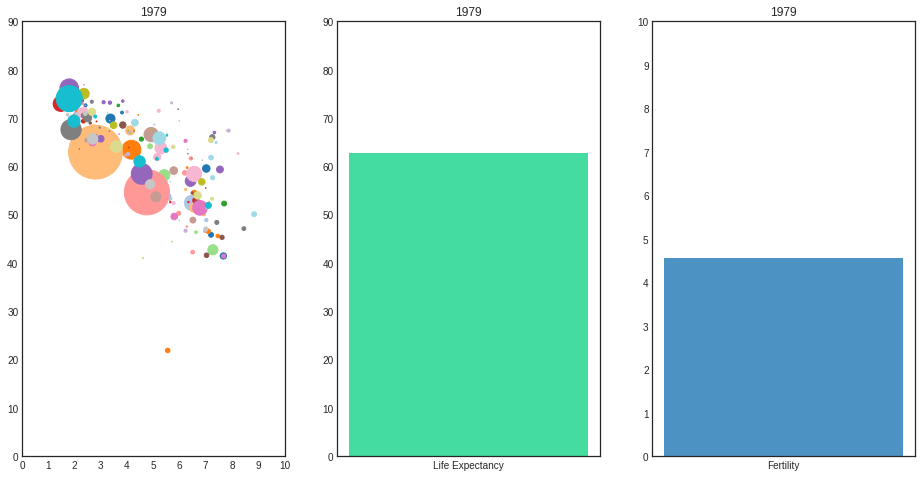

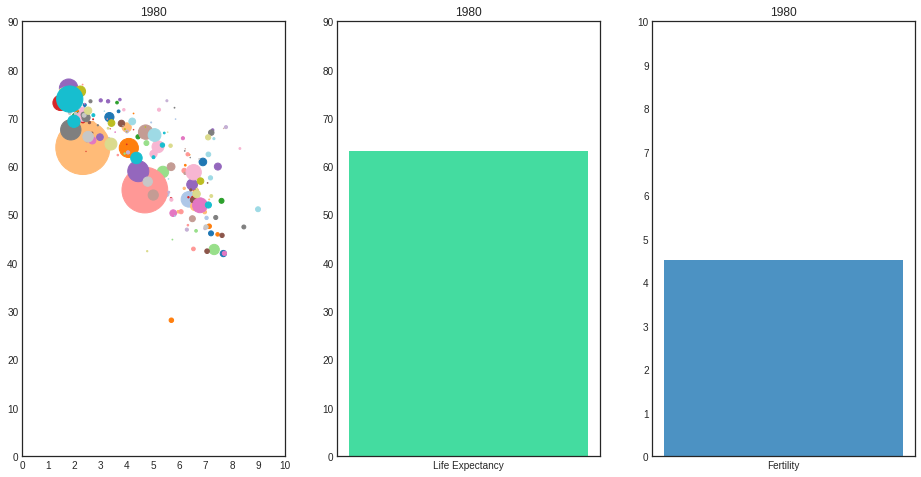

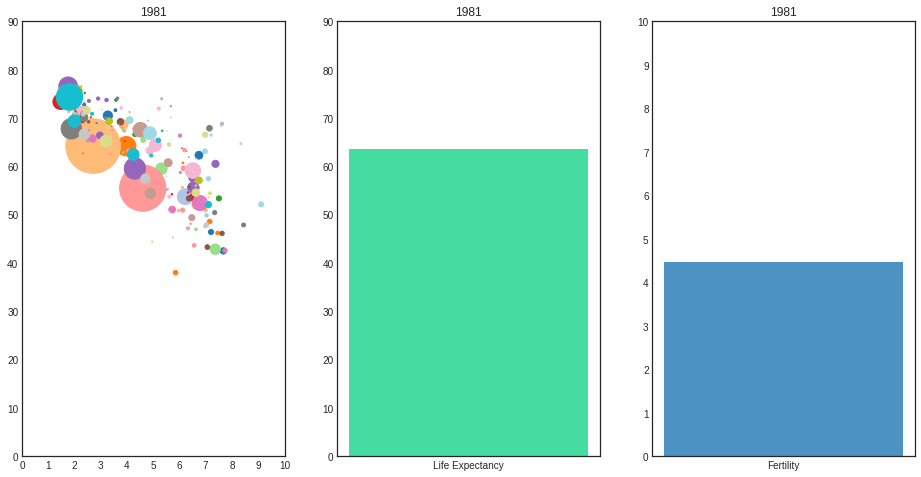

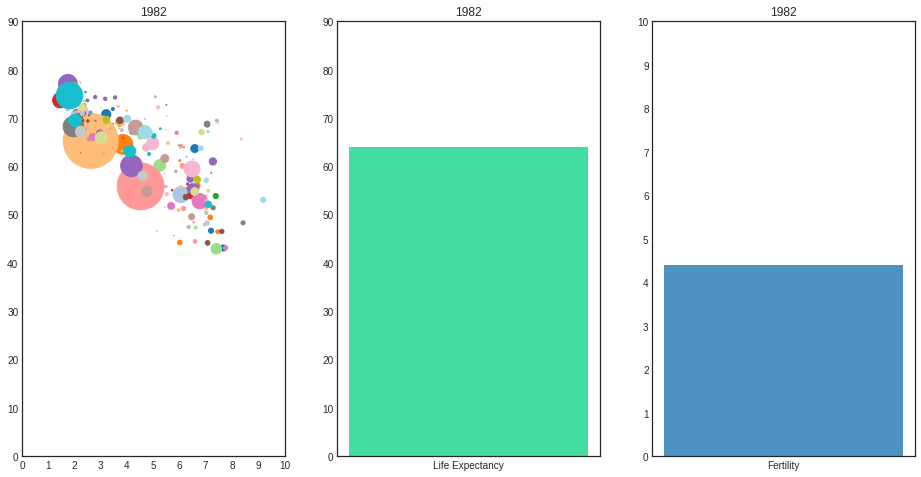

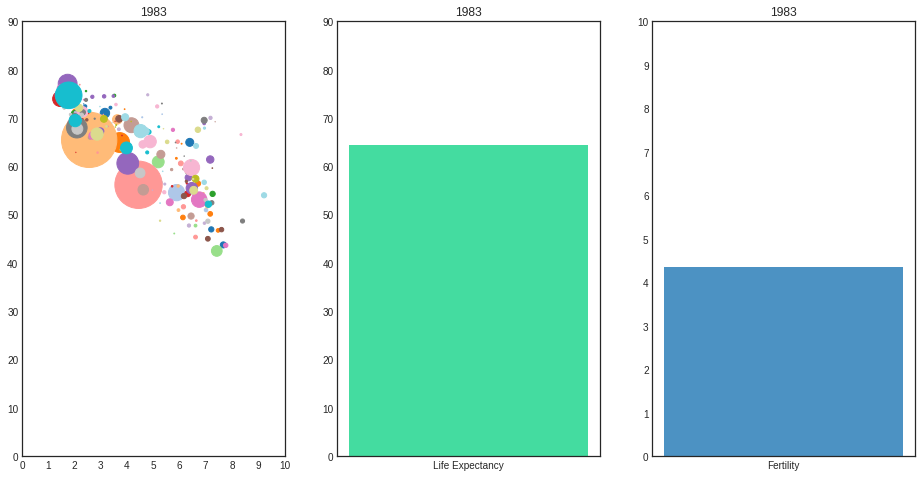

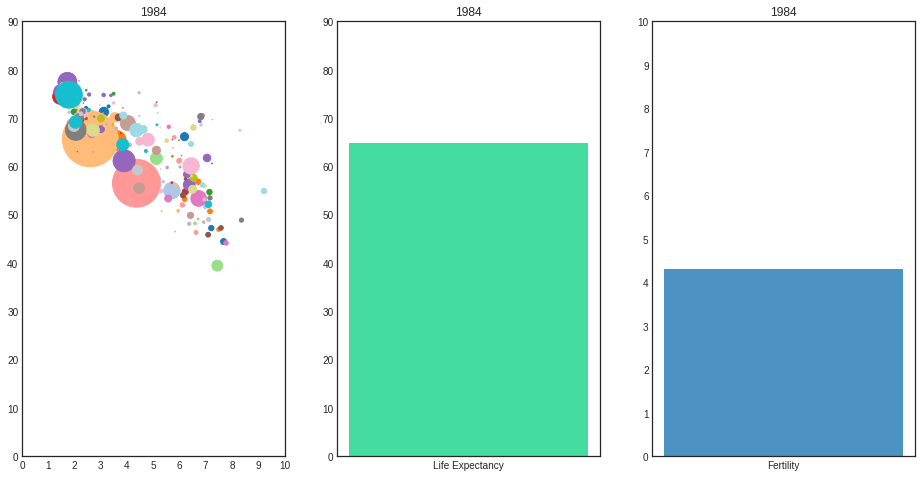

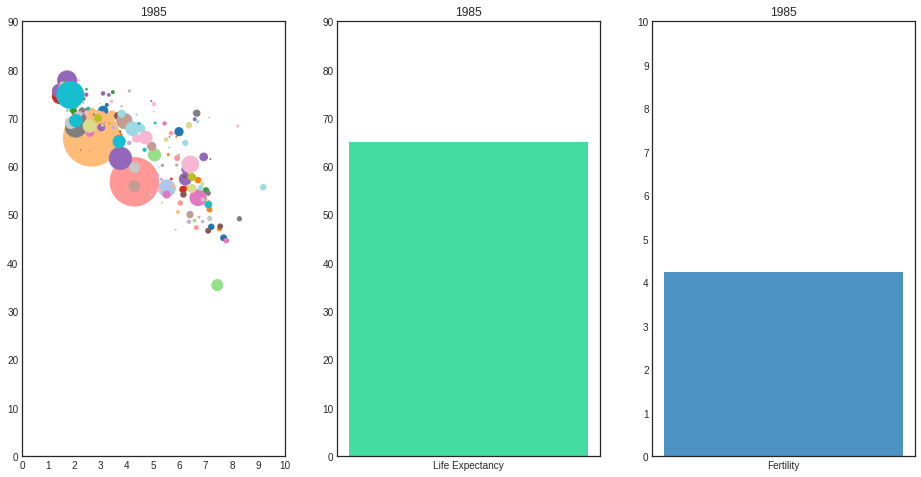

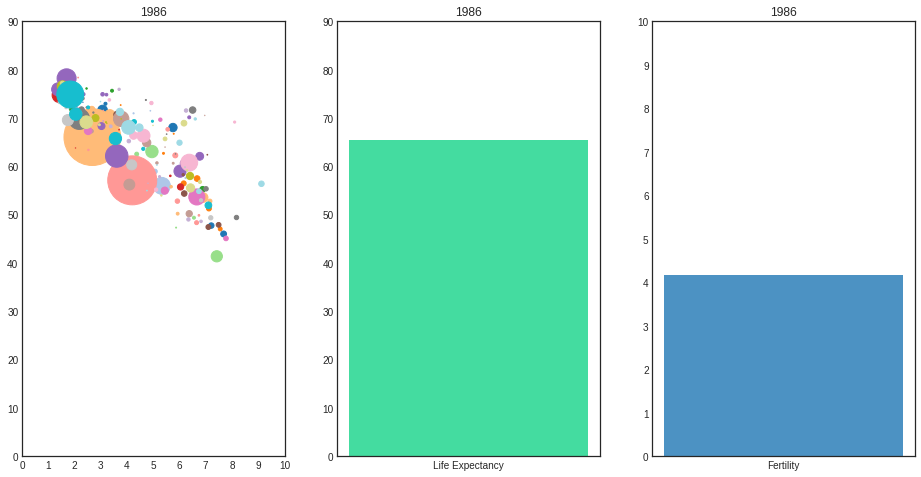

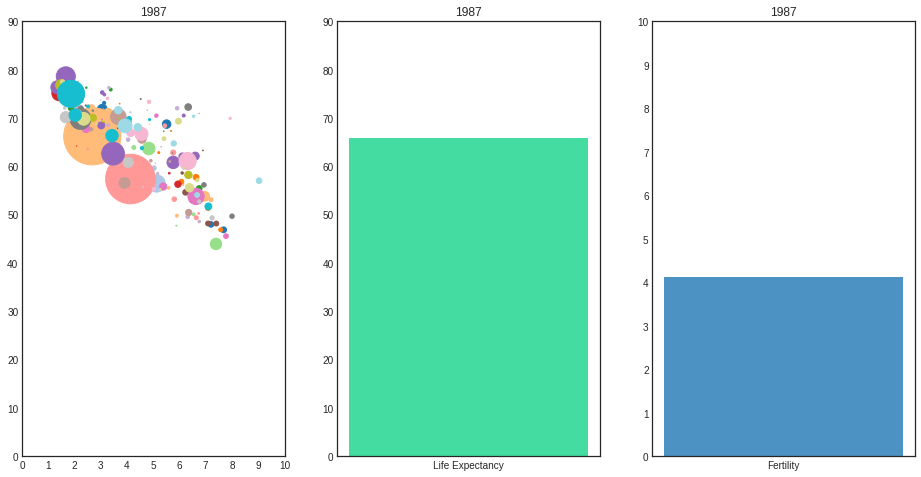

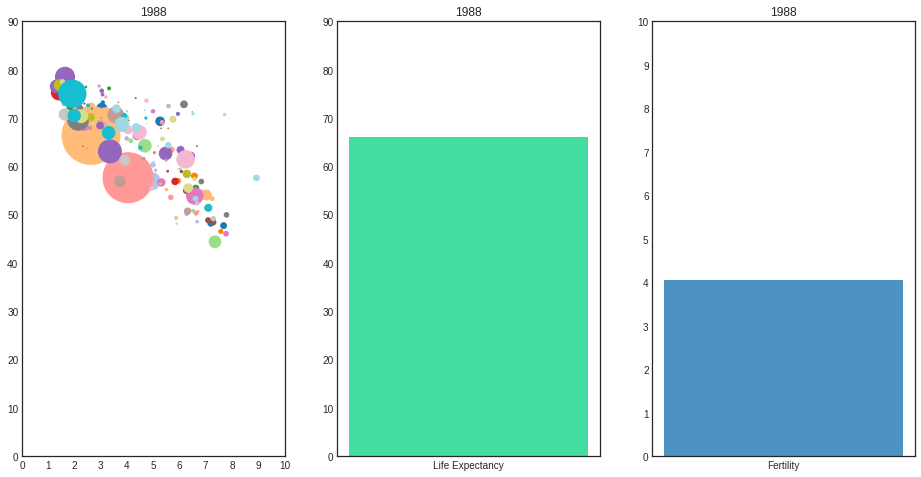

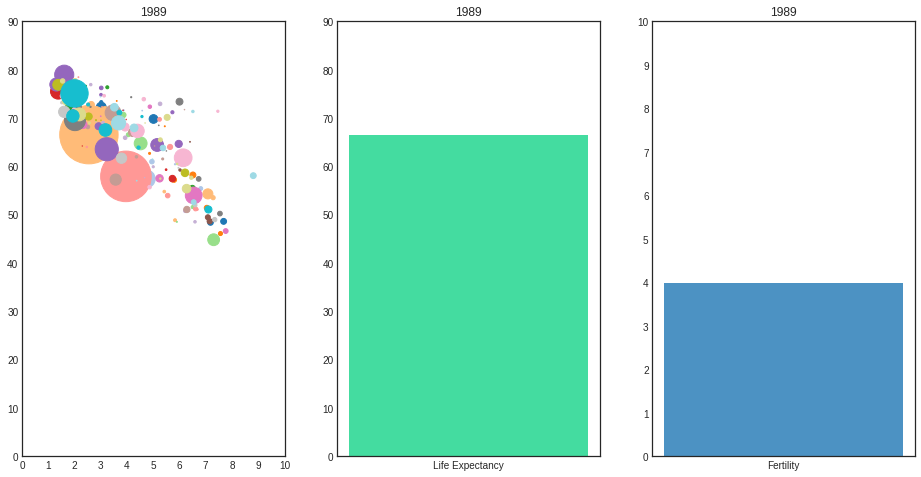

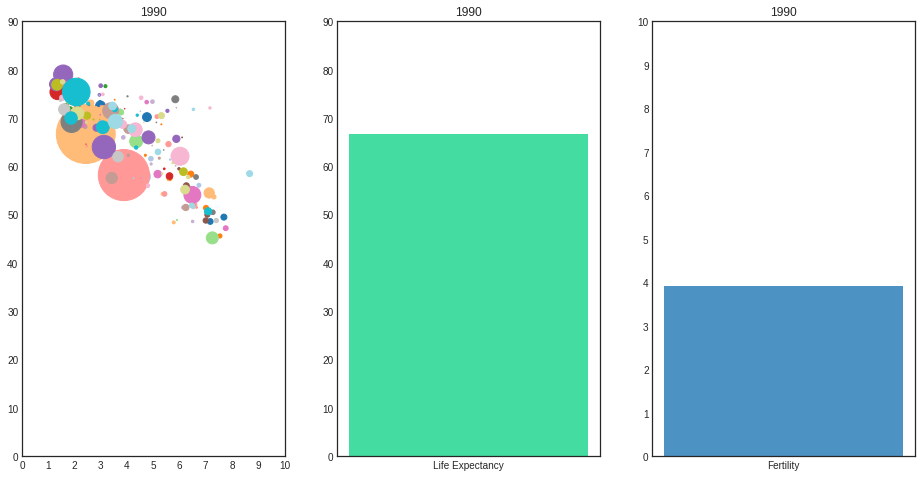

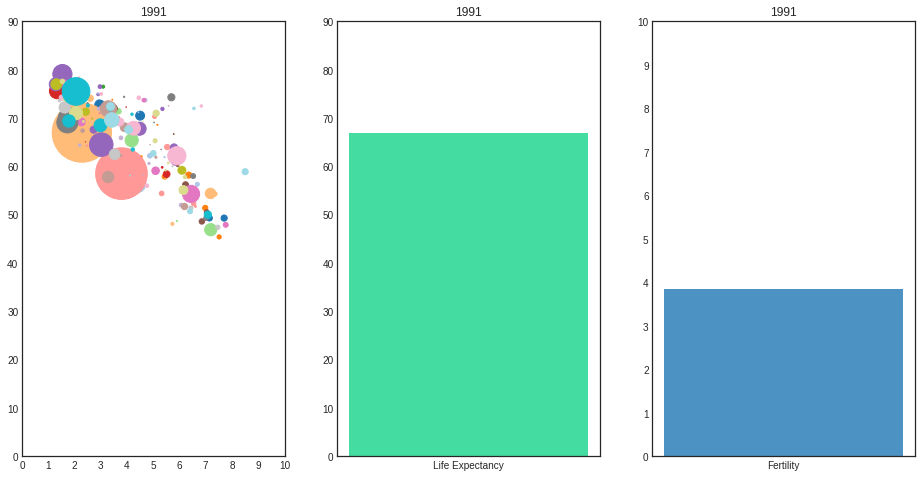

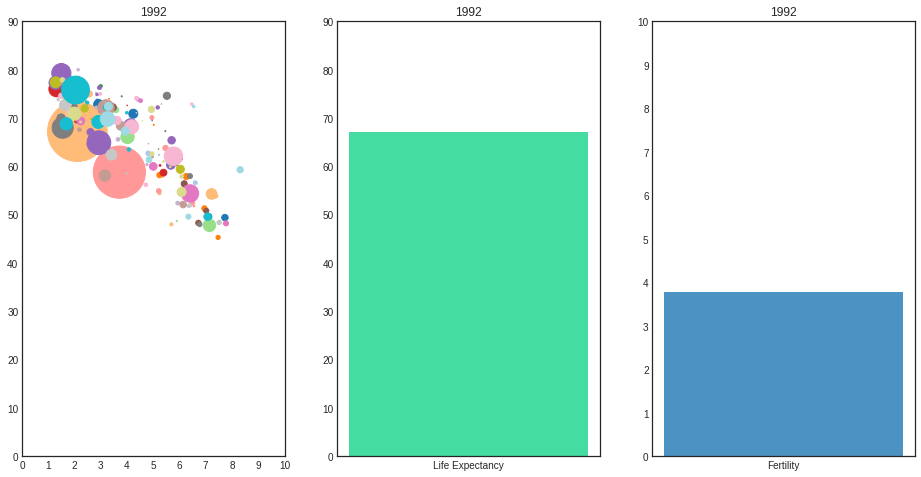

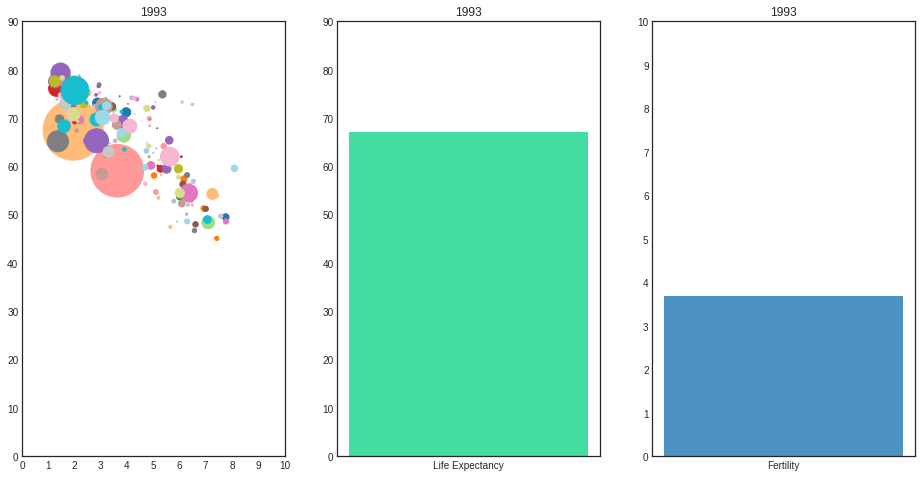

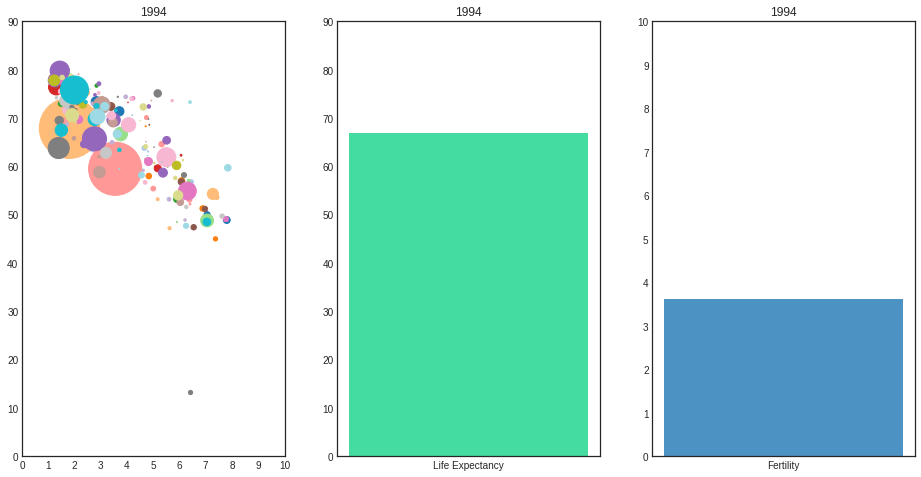

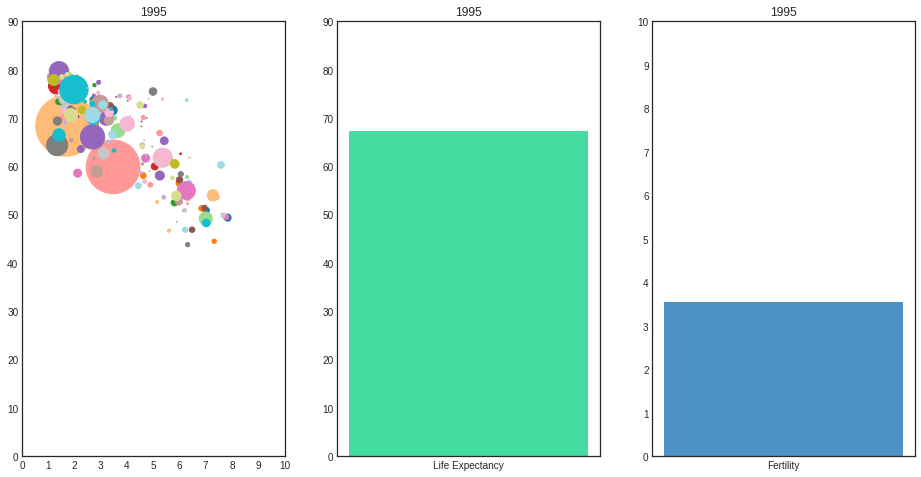

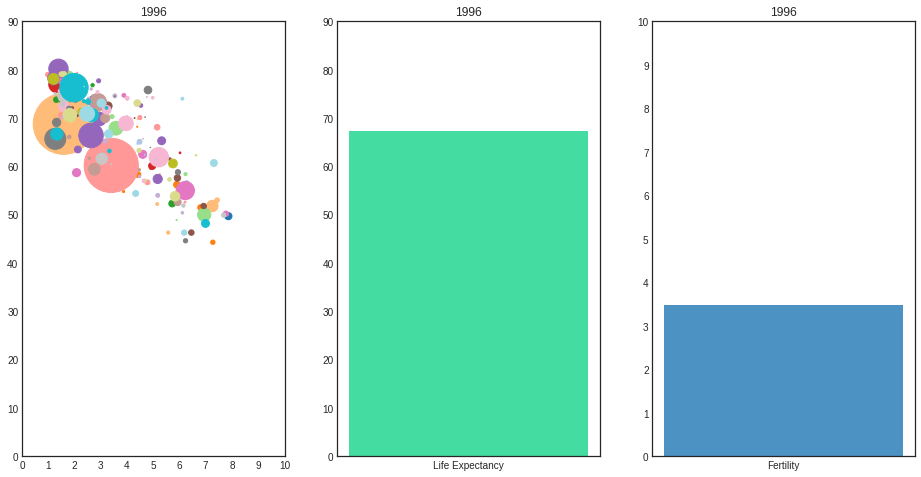

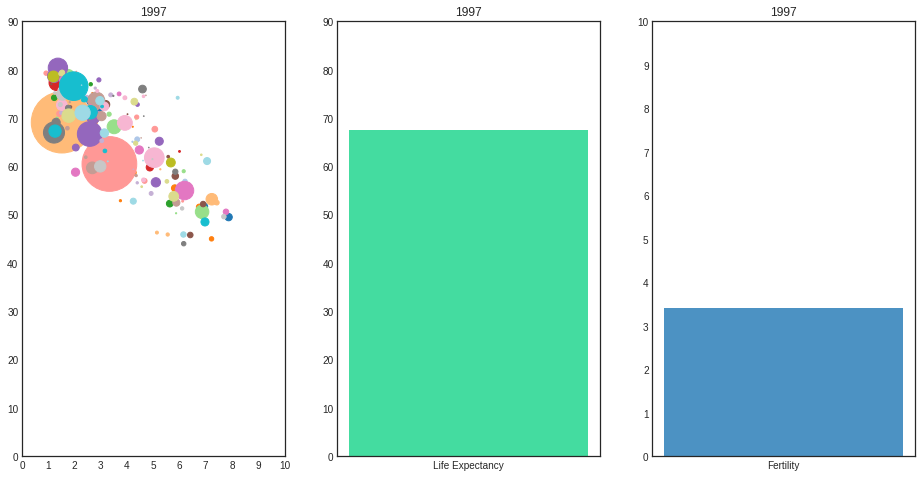

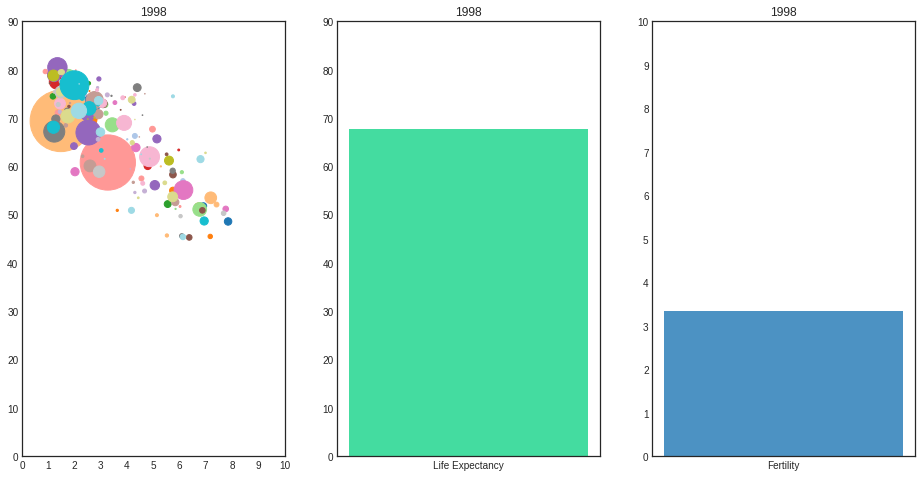

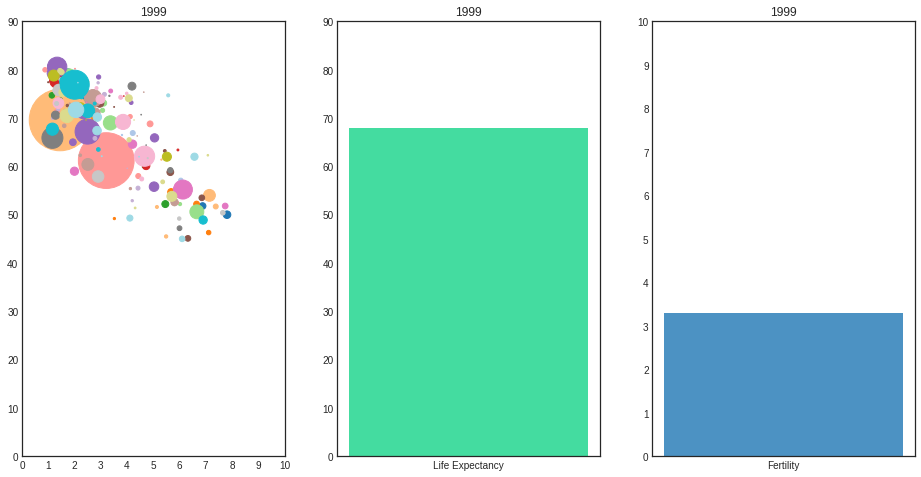

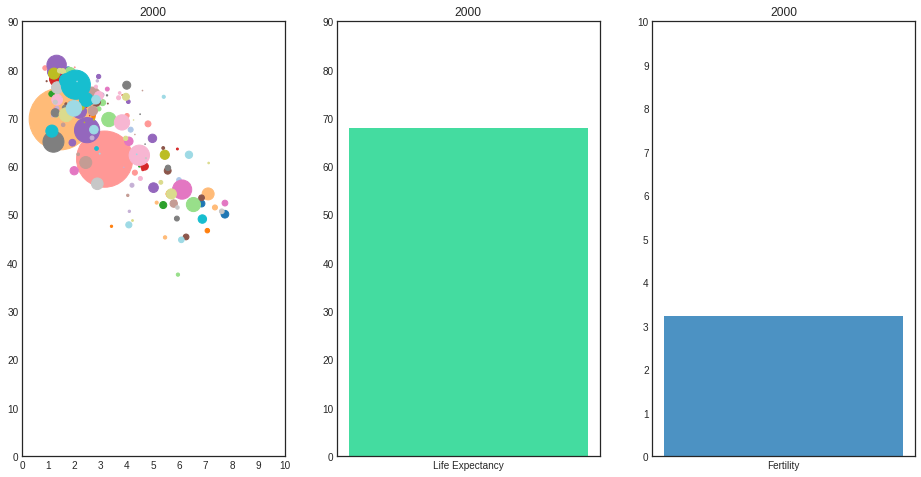

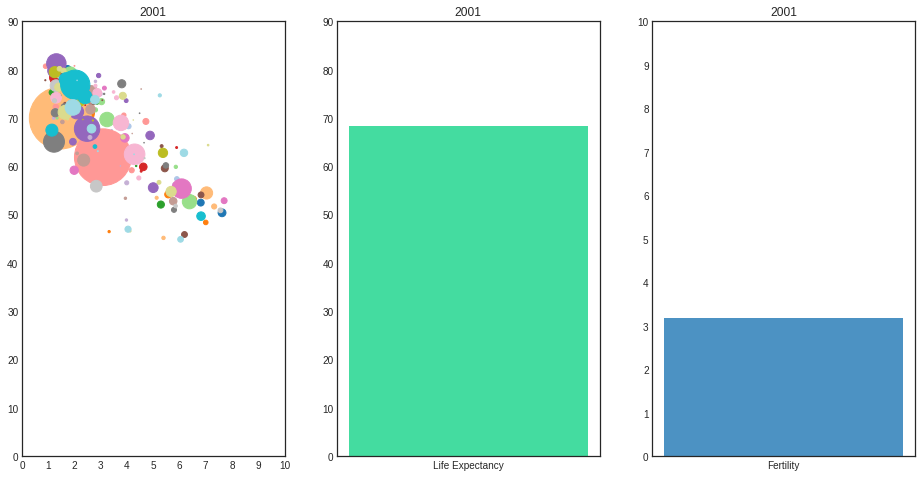

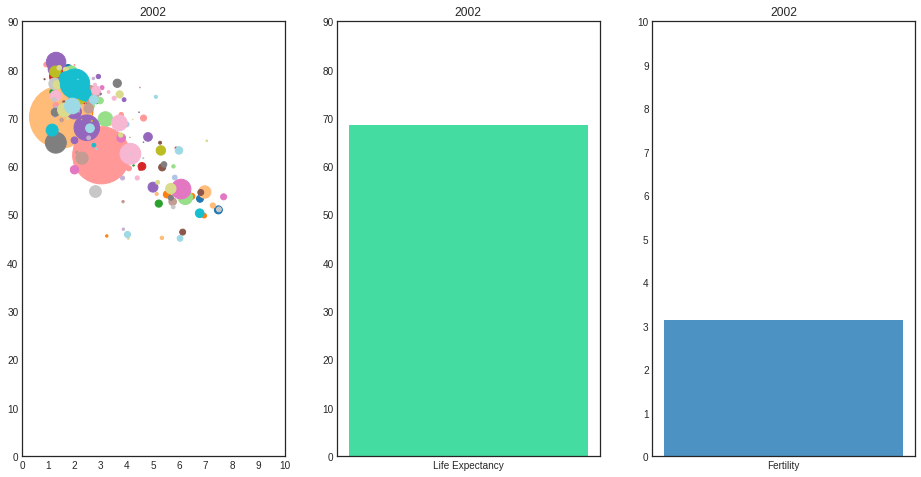

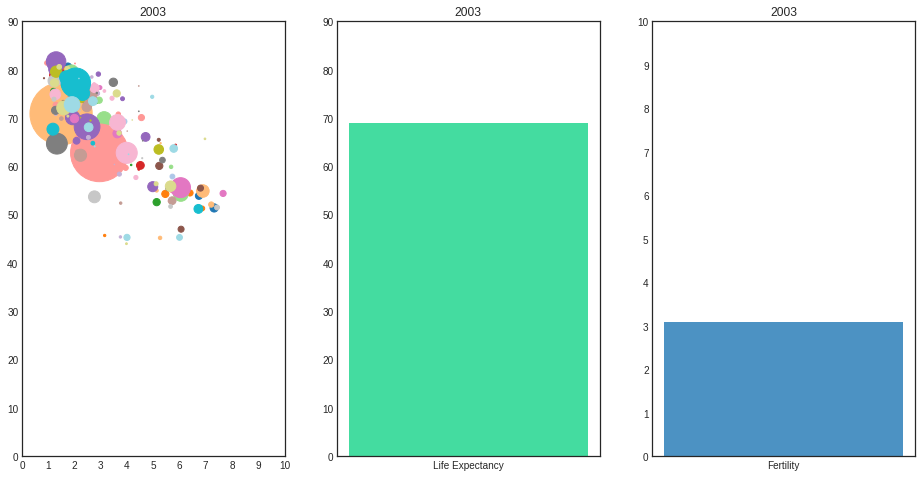

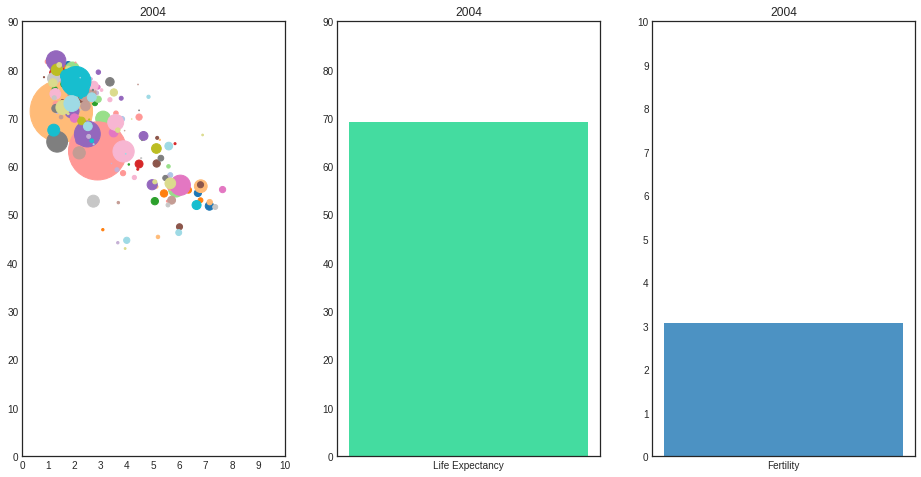

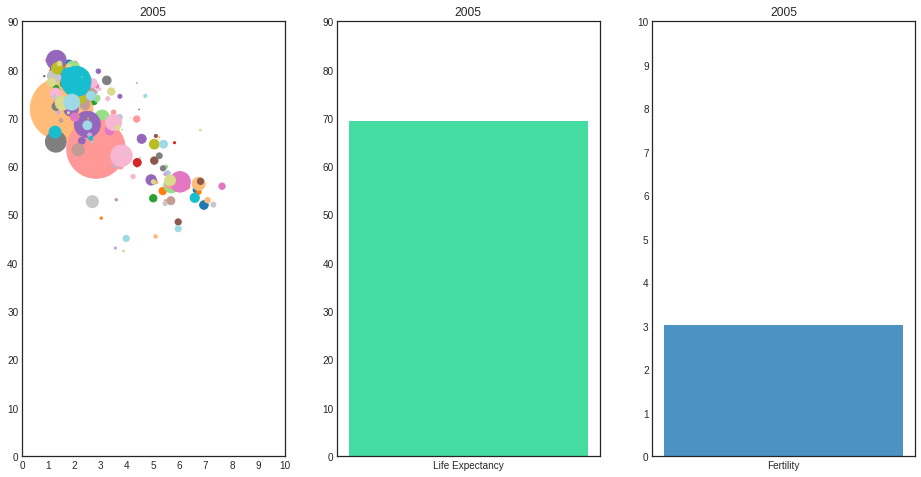

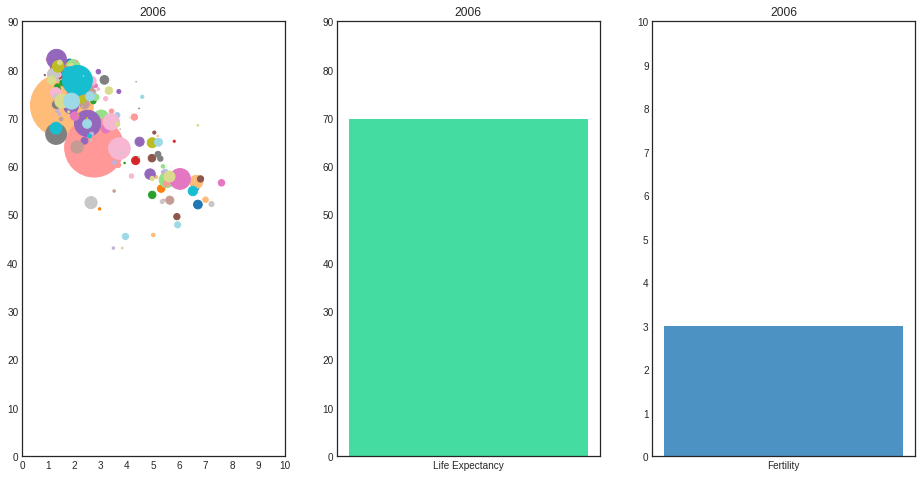

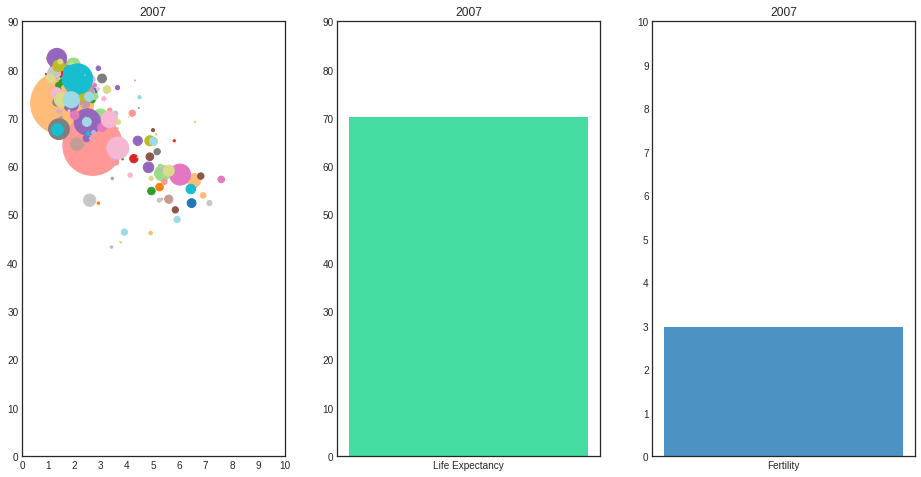

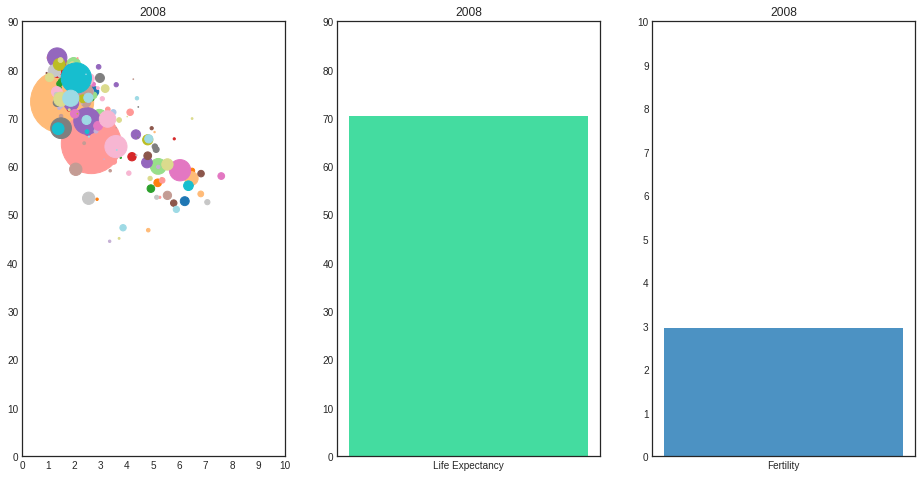

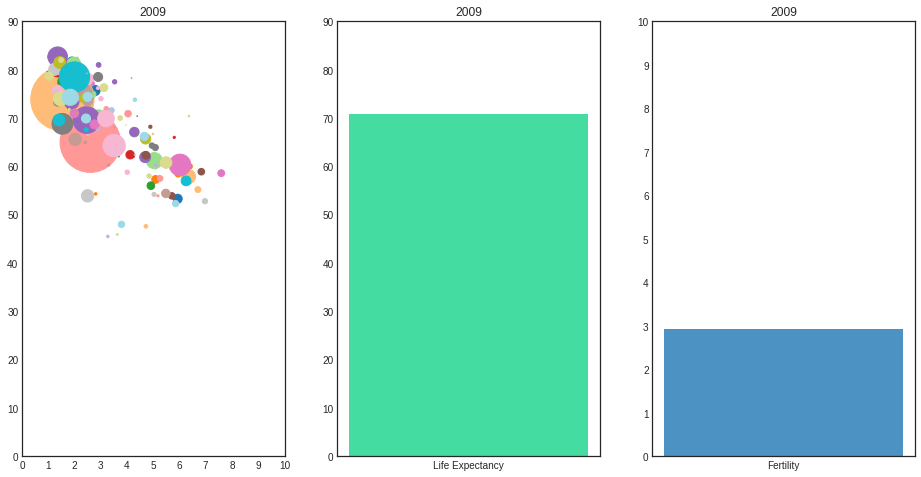

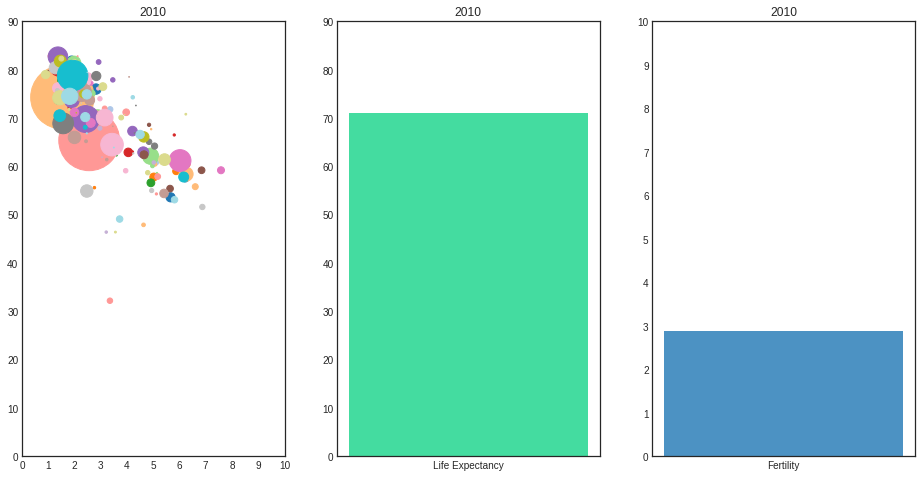

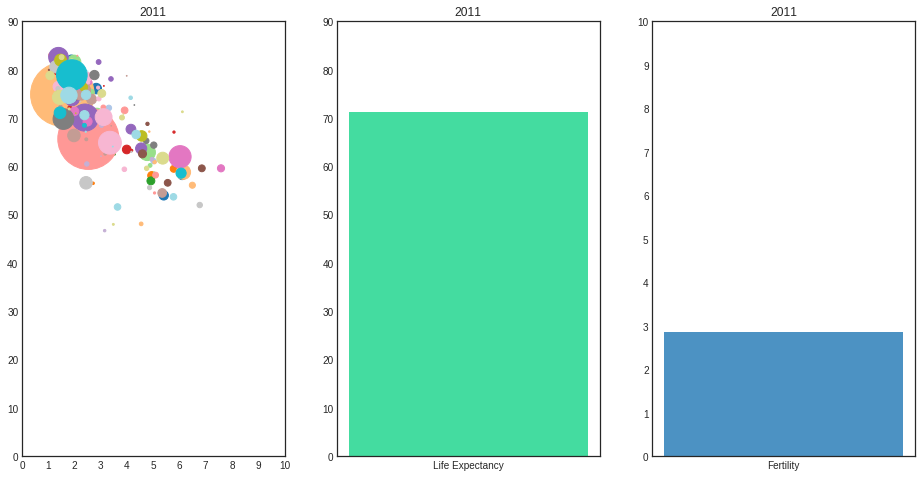

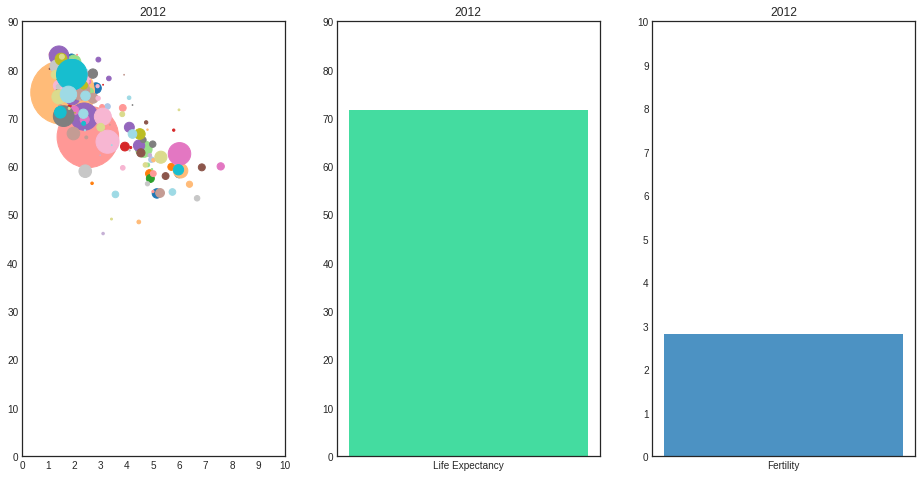

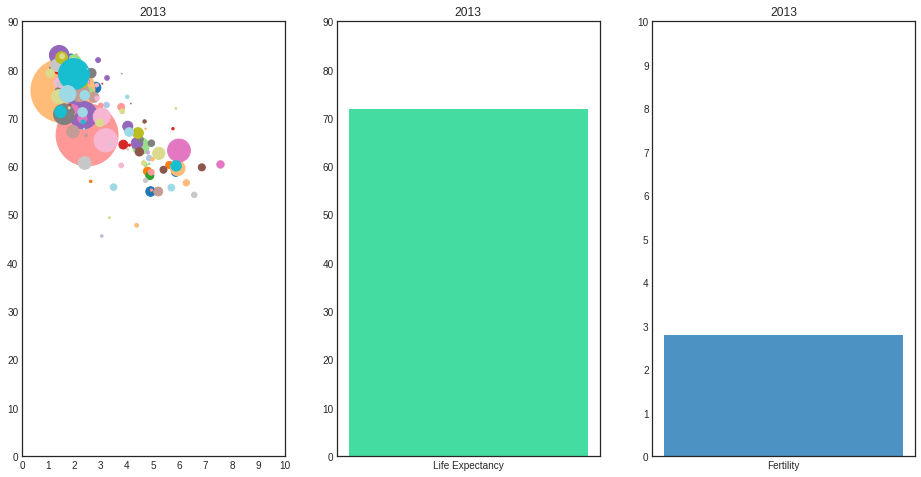

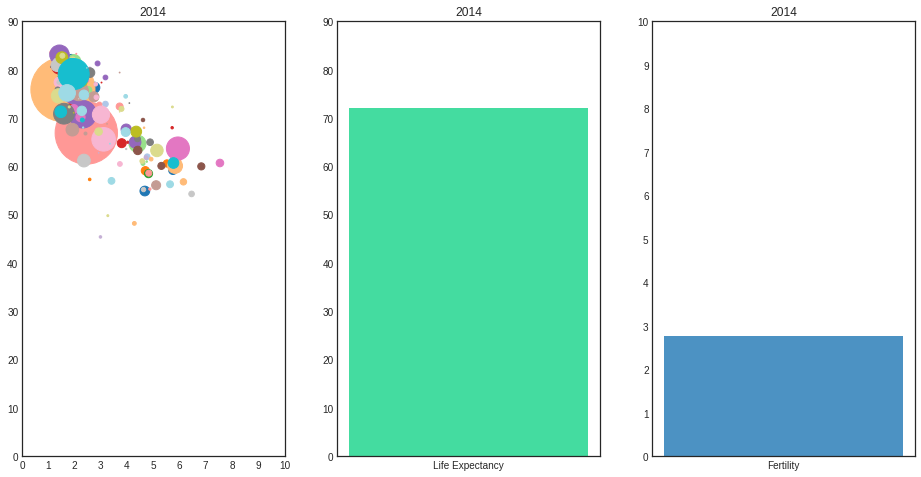

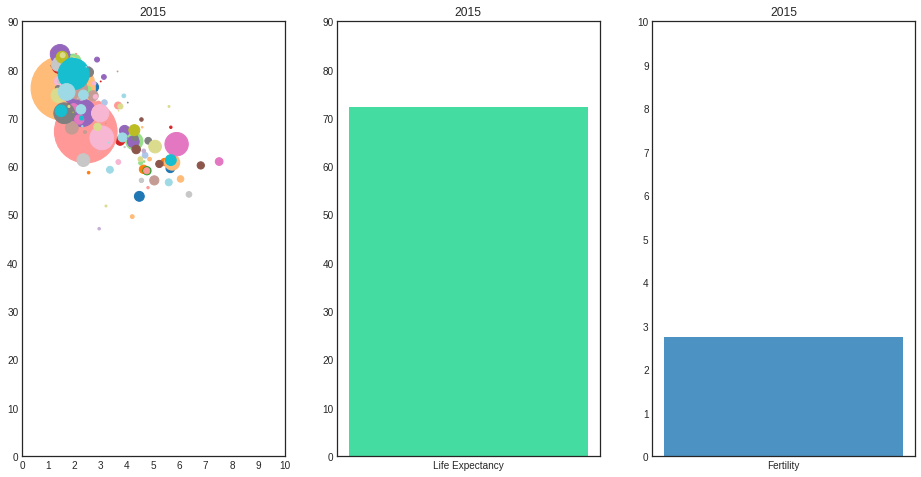

In [28]:
# multiplot for years 1960 - 2015

temp_df = df2.unstack(1)

for i in range(1960, 2016):
    new_df = temp_df[i]
    new_df = new_df.unstack(1)
    l_mean = new_df['lifeexp'].mean()
    f_mean = new_df['fertility'].mean()
    df_bar = pd.DataFrame({'l_mean': [l_mean], 'f_mean': [f_mean]})
    df_bar2 = pd.DataFrame(df_bar.unstack())
    df_bar2 = df_bar2.reset_index().rename(columns={0:'mean', 'level_0': 'lifeexp_fertility'})
    df_bar2 = df_bar2.drop(columns='level_1').set_index('lifeexp_fertility')
    
    new_df = temp_df[i]
    new_df = new_df.unstack(1)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8)) # Create empty figure with 1x3 grid

    bar_width = 1
    opacity = 0.8
    
    # scatterplot
    cmap = plt.get_cmap('tab20', lut = len(new_df)).colors
    ax1.scatter(x=new_df['fertility'], y=new_df['lifeexp'], s=new_df['pop_in_mill'] * 3, c=cmap)
    ax1.set_title(f'{i}') # Add year to title
    ax1.set_xticks(list(range(0, 11))) # Fix ticks, so they don't jump around
    ax1.set_yticks(list(range(0, 100, 10))) # Fix ticks
    
    # middle barplot
    ax2.bar('Life Expectancy', df_bar2['mean']['l_mean'], bar_width, color='#15d488', alpha=opacity)
    ax2.set_title(f'{i}')
    ax2.set_yticks(list(range(0, 100, 10)))
    
    # right barplot
    ax3.bar('Fertility', df_bar2['mean']['f_mean'], bar_width, alpha=opacity)
    ax3.set_title(f'{i}')
    ax3.set_yticks(list(range(0, 11)))

    plt.style.use('seaborn-white')
    plt.savefig(f'multiplot_images/{i}.png')

In [113]:
# make gif

import imageio

images = []

for i in range(1960, 2016):
    filename = 'multiplot_images/{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output_mult.gif', images, fps=15)